In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [19]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0



In [20]:
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [21]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [22]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 58s 91ms/step - loss: 1.5897 - accuracy: 0.4322 - val_loss: 1.3836 - val_accuracy: 0.5154
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 1.2402 - accuracy: 0.5615 - val_loss: 1.1757 - val_accuracy: 0.5906
Epoch 3/10
625/625 [==============================] - 49s 78ms/step - loss: 1.1001 - accuracy: 0.6123 - val_loss: 1.0611 - val_accuracy: 0.6359
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 1.0141 - accuracy: 0.6453 - val_loss: 1.0343 - val_accuracy: 0.6441
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.9605 - accuracy: 0.6685 - val_loss: 0.9880 - val_accuracy: 0.6582
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.8996 - accuracy: 0.6892 - val_loss: 1.0189 - val_accuracy: 0.6541
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.8531 - accuracy: 0.7041 - val_loss: 0.9928 - val_accuracy:

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 [==============================] - 4s 12ms/step - loss: 0.9423 - accuracy: 0.6840
Test accuracy: 68.40%


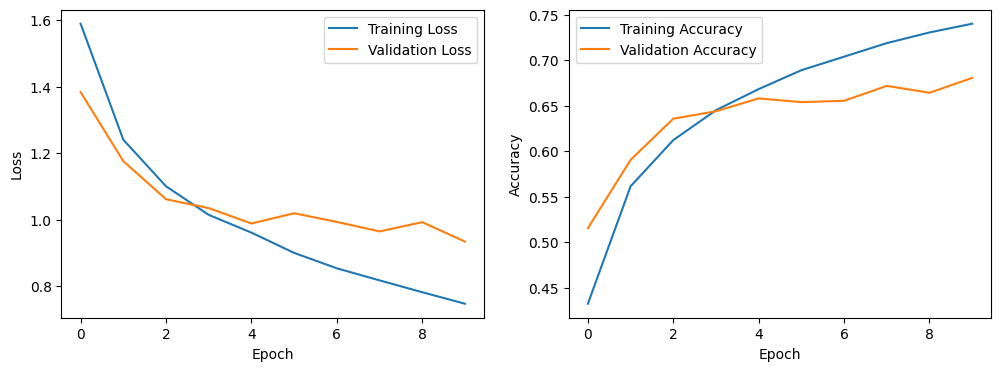

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Kernel weights of the first convolutional layer: (3, 3, 3, 32)


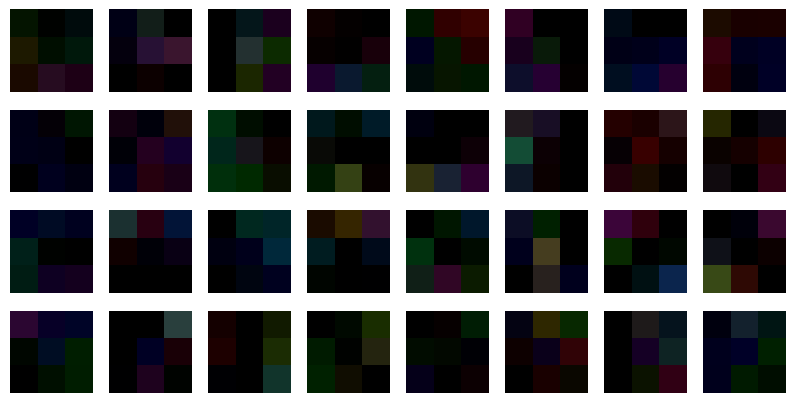

In [31]:

conv1_layer = None
for layer in model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        conv1_layer = layer
        break

if conv1_layer is not None:
    conv1_weights = conv1_layer.get_weights()[0]
    print("Kernel weights of the first convolutional layer:", conv1_weights.shape)
else:
    print("No convolutional layer found in the model.")
# Visualize the filters
plt.figure(figsize=(10, 5))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(conv1_weights[:, :, :, i])
    plt.axis("off")
plt.show()


1/1 [==============================] - 1s 502ms/step


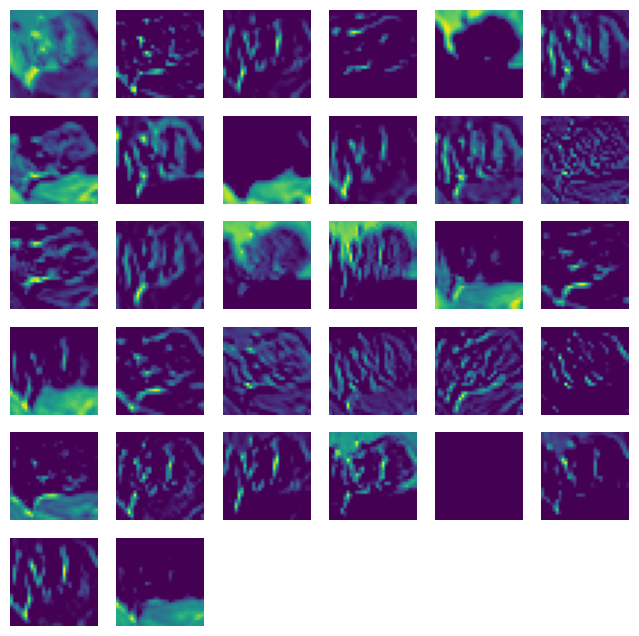

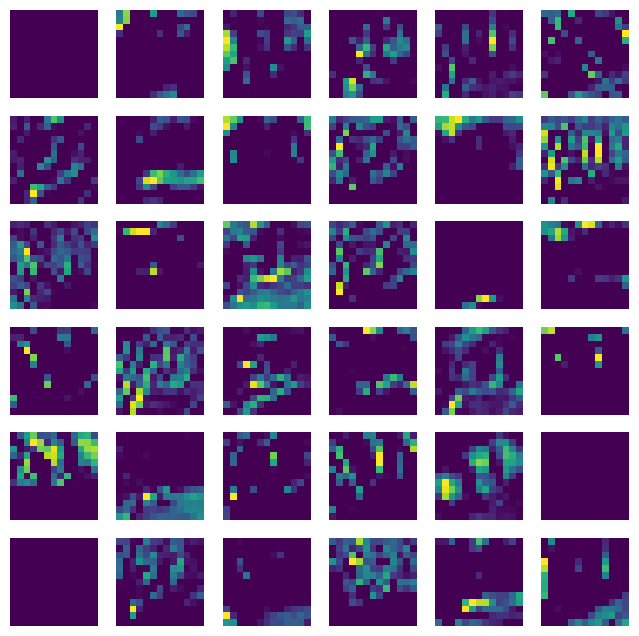

In [29]:

activation_model = keras.Model(inputs=model.input,
                               outputs=[layer.output for layer in model.layers])


img = x_test[0:1]
activations = activation_model.predict(img)


layer_names = [layer.name for layer in model.layers]
for i, activation in enumerate(activations):
    if "conv2d" in layer_names[i]:
        plt.figure(figsize=(8, 8))
        for j in range(min(36, activation.shape[-1])):
            plt.subplot(6, 6, j + 1)
            plt.imshow(activation[0, :, :, j], cmap="viridis")
            plt.axis("off")
        plt.show()

